In [103]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
import re
import ast
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [104]:
credit = pd.read_csv('credits.csv',encoding='utf-8')
print(np.shape(credit))
credit.head(2)


(45476, 3)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


In [105]:
credit.rename(columns={'id': 'id_pelicula'}, inplace=True)
credit.head(2)

,cast,crew,id_pelicula
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


In [106]:
movies = pd.read_csv('movies_dataset.csv',encoding='utf-8')
print(np.shape(movies))


(45466, 24)


C:\Users\dell5\AppData\Local\Temp\ipykernel_22780\3656280784.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_dataset.csv',encoding='utf-8')


In [107]:
movies.rename(columns={'id': 'id_pelicula'}, inplace=True)
movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id_pelicula,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [108]:
credit['id_pelicula'] = credit['id_pelicula'].astype(str)
movies['id_pelicula'] = movies['id_pelicula'].astype(str)

In [109]:
def merge_dataframes(df1, df2, columns_to_add, on_column, how='left'):
    """
    Une dos DataFrames y agrega solo las columnas especificadas del segundo DataFrame al primero.

    Parameters:
    - df1 (pd.DataFrame): El DataFrame principal al que se agregarán las columnas.
    - df2 (pd.DataFrame): El DataFrame del que se tomarán las columnas a agregar.
    - columns_to_add (list of str): Lista con los nombres de las columnas del segundo DataFrame que se desean agregar.
    - on_column (str): El nombre de la columna sobre la cual se realizará la unión.
    - how (str): Tipo de unión, como 'left', 'right', 'inner', o 'outer'. Por defecto es 'left'.

    Returns:
    - pd.DataFrame: DataFrame resultante con las columnas agregadas.
    """
    # Asegurarse de que las columnas de unión tengan el mismo tipo de dato
    df1[on_column] = df1[on_column].astype(str)
    df2[on_column] = df2[on_column].astype(str)
    
    # Realiza la unión entre los DataFrames
    df_merged = pd.merge(df1, df2[[on_column] + columns_to_add], on=on_column, how=how)
    return df_merged

In [110]:
columns_to_add = ['cast','crew']
on_column = 'id_pelicula'
how = 'inner'

data_movies= merge_dataframes(movies,credit, columns_to_add, on_column, how)
print(np.shape(data_movies))
data_movies.head(2)
data_movies.dropna(inplace=True)

(45538, 26)


tomar todas las variables menos: video, imdb_id, adult, original_title, poster_path y homepage

In [111]:
data_movies=data_movies[['id_pelicula', 'genres', 'spoken_languages', 'popularity', 'production_companies', 'release_date', 'revenue', 'runtime', 'title', 'vote_average', 'vote_count', 'cast', 'crew']]
data_movies.head(2)

,id_pelicula,genres,spoken_languages,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
9,710,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,352194034.0,130.0,GoldenEye,6.6,1194.0,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de..."
68,10634,"[{'id': 35, 'name': 'Comedy'}]","[{'iso_639_1': 'en', 'name': 'English'}]",14.56965,"[{'name': 'New Line Cinema', 'id': 12}]",1995-04-26,28215918.0,91.0,Friday,7.0,513.0,"[{'cast_id': 1, 'character': 'Craig Jones', 'c...","[{'credit_id': '52fe43999251416c75016ad5', 'de..."


In [112]:
def conversion(text):
    # Verificar si text es una cadena y no una lista o diccionario ya evaluado
    if isinstance(text, str):
        try:
            text = ast.literal_eval(text)  # Intenta evaluar la cadena
        except (ValueError, SyntaxError):
            return []  # Retorna una lista vacía si la evaluación falla

    # Asumiendo que text es ahora una lista de diccionarios
    valores_Extraidos = []
    for i in text:
        # Comprueba que cada elemento es un diccionario y contiene la clave 'name'
        if isinstance(i, dict) and 'name' in i:
            valores_Extraidos.append(i['name'])
    
    return valores_Extraidos

In [113]:
data_movies['genres']=data_movies['genres'].apply(conversion)
data_movies['production_companies']=data_movies['production_companies'].apply(conversion)
data_movies['spoken_languages']=data_movies['spoken_languages'].apply(conversion)
data_movies['cast']=data_movies['cast'].apply(conversion)


In [114]:
data_movies.head(2)

,id_pelicula,genres,spoken_languages,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
9,710,"[Adventure, Action, Thriller]","[English, Pусский, Español]",14.686036,"[United Artists, Eon Productions]",1995-11-16,352194034.0,130.0,GoldenEye,6.6,1194.0,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de..."
68,10634,[Comedy],[English],14.56965,[New Line Cinema],1995-04-26,28215918.0,91.0,Friday,7.0,513.0,"[Ice Cube, Chris Tucker, Nia Long, Tom Lister ...","[{'credit_id': '52fe43999251416c75016ad5', 'de..."


In [115]:
def selec_director(text):
    director=[]
    for i in ast.literal_eval(text):
        if i['job']=='Director':
            director.append(i['name'])
    return director

In [116]:
data_movies['crew']=data_movies['crew'].apply(selec_director)

In [117]:
data_movies.head(2)

,id_pelicula,genres,spoken_languages,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
9,710,"[Adventure, Action, Thriller]","[English, Pусский, Español]",14.686036,"[United Artists, Eon Productions]",1995-11-16,352194034.0,130.0,GoldenEye,6.6,1194.0,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,...",[Martin Campbell]
68,10634,[Comedy],[English],14.56965,[New Line Cinema],1995-04-26,28215918.0,91.0,Friday,7.0,513.0,"[Ice Cube, Chris Tucker, Nia Long, Tom Lister ...",[F. Gary Gray]


In [118]:
data_movies.count()

id_pelicula             695
genres                  695
spoken_languages        695
popularity              695
production_companies    695
release_date            695
revenue                 695
runtime                 695
title                   695
vote_average            695
vote_count              695
cast                    695
crew                    695
dtype: int64

In [119]:
def elim_esp_vacios(L):
    lista=[]
    for i in L:
        lista.append(i.replace(' ', ''))
    return lista

In [120]:
data_movies['genres']=data_movies['genres'].apply(elim_esp_vacios)
data_movies['spoken_languages']=data_movies['spoken_languages'].apply(elim_esp_vacios)
data_movies['production_companies']=data_movies['production_companies'].apply(elim_esp_vacios)
data_movies['cast']=data_movies['cast'].apply(elim_esp_vacios)
data_movies['crew']=data_movies['crew'].apply(elim_esp_vacios)

In [121]:
data_movies.head(2)

,id_pelicula,genres,spoken_languages,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
9,710,"[Adventure, Action, Thriller]","[English, Pусский, Español]",14.686036,"[UnitedArtists, EonProductions]",1995-11-16,352194034.0,130.0,GoldenEye,6.6,1194.0,"[PierceBrosnan, SeanBean, IzabellaScorupco, Fa...",[MartinCampbell]
68,10634,[Comedy],[English],14.56965,[NewLineCinema],1995-04-26,28215918.0,91.0,Friday,7.0,513.0,"[IceCube, ChrisTucker, NiaLong, TomListerJr., ...",[F.GaryGray]


In [122]:
data_movies['tags']= data_movies['genres'] + data_movies['spoken_languages'] + data_movies['production_companies'] + data_movies['cast'] + data_movies['crew']
data_movies.head(2)

,id_pelicula,genres,spoken_languages,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew,tags
9,710,"[Adventure, Action, Thriller]","[English, Pусский, Español]",14.686036,"[UnitedArtists, EonProductions]",1995-11-16,352194034.0,130.0,GoldenEye,6.6,1194.0,"[PierceBrosnan, SeanBean, IzabellaScorupco, Fa...",[MartinCampbell],"[Adventure, Action, Thriller, English, Pусский..."
68,10634,[Comedy],[English],14.56965,[NewLineCinema],1995-04-26,28215918.0,91.0,Friday,7.0,513.0,"[IceCube, ChrisTucker, NiaLong, TomListerJr., ...",[F.GaryGray],"[Comedy, English, NewLineCinema, IceCube, Chri..."


In [123]:
movies_new=data_movies.drop(columns=['genres', 'spoken_languages', 'production_companies', 'cast', 'crew'])
movies_new.head(2)

,id_pelicula,popularity,release_date,revenue,runtime,title,vote_average,vote_count,tags
9,710,14.686036,1995-11-16,352194034.0,130.0,GoldenEye,6.6,1194.0,"[Adventure, Action, Thriller, English, Pусский..."
68,10634,14.56965,1995-04-26,28215918.0,91.0,Friday,7.0,513.0,"[Comedy, English, NewLineCinema, IceCube, Chri..."


In [124]:
movies_new['tags']= movies_new['tags'].apply(lambda x: " ".join(x))


In [125]:
movies_new = movies_new.reset_index(drop=True)

In [126]:
movies_new.head(20)

,id_pelicula,popularity,release_date,revenue,runtime,title,vote_average,vote_count,tags
0,710,14.686036,1995-11-16,352194034.0,130.0,GoldenEye,6.6,1194.0,Adventure Action Thriller English Pусский Espa...
1,10634,14.56965,1995-04-26,28215918.0,91.0,Friday,7.0,513.0,Comedy English NewLineCinema IceCube ChrisTuck...
2,755,15.339153,1996-01-19,25836616.0,108.0,From Dusk Till Dawn,6.9,1644.0,Horror Action Thriller Crime English Español A...
3,5894,11.528147,1995-09-15,1275000.0,83.0,Blue in the Face,6.8,28.0,Comedy English MiramaxFilms InterAL HarveyKeit...
4,9070,7.024227,1995-06-30,66000000.0,92.0,Mighty Morphin Power Rangers: The Movie,5.2,153.0,Action Adventure ScienceFiction Family Fantasy...
5,2292,10.513367,1994-09-13,3151130.0,92.0,Clerks,7.4,769.0,Comedy English MiramaxFilms ViewAskewProductio...
6,11,42.149697,1977-05-25,775398007.0,121.0,Star Wars,8.1,6778.0,Adventure Action ScienceFiction English Lucasf...
7,22586,8.910462,1994-11-18,9771658.0,89.0,The Swan Princess,6.5,251.0,Animation English RichAnimationStudios Michell...
8,8587,21.605761,1994-06-23,788241776.0,89.0,The Lion King,8.0,5520.0,Family Animation Drama English WaltDisneyPictu...
9,329,8.863776,1993-06-11,920100000.0,127.0,Jurassic Park,7.6,4956.0,Adventure ScienceFiction English Español Unive...


In [127]:
movies_new.shape

(695, 9)

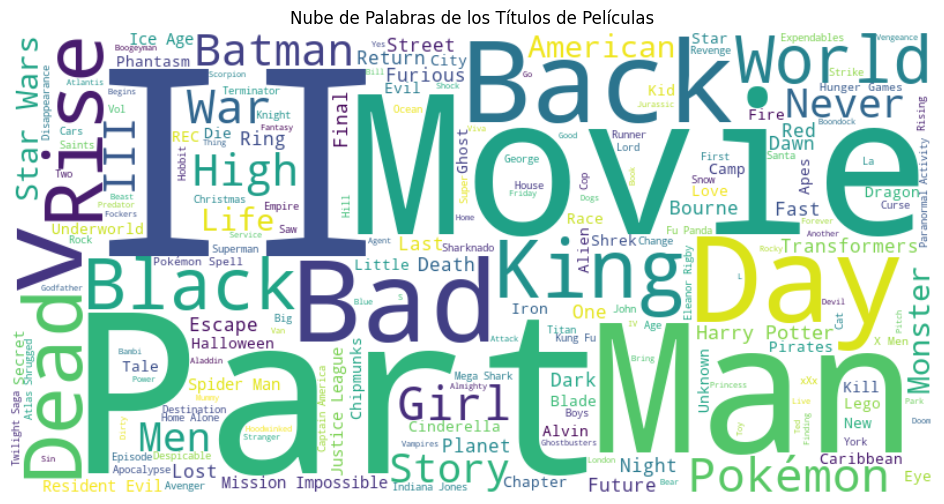

In [128]:
# Nube de palabras de los títulos de películas
text = ' '.join(title for title in movies_new.title.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Títulos de Películas')
plt.show()

## CREACION DEL MODELO

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer(max_features=5000, stop_words='english')

In [130]:
vector=cv.fit_transform(movies_new['tags']).toarray()

In [131]:
vector.shape

(695, 5000)

In [132]:
from sklearn.metrics.pairwise import cosine_similarity

similitud= cosine_similarity(vector)
similitud

array([[1.        , 0.04850713, 0.15118579, ..., 0.13093073, 0.09847319,
        0.12060454],
       [0.04850713, 1.        , 0.04583492, ..., 0.05292561, 0.02985407,
        0.14625448],
       [0.15118579, 0.04583492, 1.        , ..., 0.08247861, 0.06978632,
        0.17094086],
       ...,
       [0.13093073, 0.05292561, 0.08247861, ..., 1.        , 0.0805823 ,
        0.13159034],
       [0.09847319, 0.02985407, 0.06978632, ..., 0.0805823 , 1.        ,
        0.07422696],
       [0.12060454, 0.14625448, 0.17094086, ..., 0.13159034, 0.07422696,
        1.        ]])

In [133]:
movies_new[movies_new['title'] == 'Aladdin'].index[0]

12

In [134]:
def recomendacion(titulo):
    index= movies_new[movies_new['title'] == titulo].index[0]

    distancia= sorted(list(enumerate(similitud[index])), reverse=True, key=lambda x: x [1])

    for i in distancia [1:6]:
        print(movies_new.iloc[i[0]].title)

In [135]:
recomendacion('Star Wars')

The Empire Strikes Back
Return of the Jedi
Star Wars: Episode III - Revenge of the Sith
Mighty Morphin Power Rangers: The Movie
Raiders of the Lost Ark


## GUARDAR CSV

In [137]:
# Guardar el DataFrame como un archivo CSV
movies_new.to_csv('MoviesML.csv', index=False)